<a href="https://colab.research.google.com/github/jaalvaradoh/s6/blob/main/s6_parte3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://miro.medium.com/v2/resize:fit:1400/1*zomnCz8-VMgrSV8eLCx2tw.gif" width="200" alt="molecula"  />

$$\Large \textit{Cuaderno de Código #6 | Sesión Nº 6}$$

---
$$\large\textbf{Clustering: KMeans vs DBSCAN}$$

---
$$\textit{Density-Based Spatial Clustering of Applications with Noise | Parte 3}$$

<br>
<br>

__Dr. Jesus Alvarado-Huayhuaz__

### __Agrupación__: una técnica de aprendizaje automático no supervisada

* Los puntos de datos dentro del mismo grupo son similares entre sí
* Los puntos de datos en diferentes grupos son diferentes entre sí

Algunas aplicaciones:

* Agrupación de documentos
* Motor de recomendación
* Segmentación de imagen
* Segmentación de mercado
* Agrupación de resultados de búsqueda
* Detección de anomalías.

### __K-Means__

<img src="https://miro.medium.com/max/1200/1*rw8IUza1dbffBhiA4i0GNQ.png" width="500" alt="kmeans"/>
<img src="https://www.unioviedo.es/compnum/laboratorios_py/new/d1.png" width="500" alt="kmeans"/>

### __DBSCAN__

* Diferenciar grupos de puntos por su densidad es la idea principal del DBSCAN
* El DBSCAN agrupa los puntos con un vecindario denso en grupos
* Se basa en la densidad de las muestras para identificar los clusters
* Los clusters identificados por DBSCAN pueden ser de cualquier forma

__Parámetros__:

* $\varepsilon (\textbf{eps o epsilon})$: define el tamaño y los bordes de cada vecindario, el $\varepsilon$ es un radio.Se describe la vecindad como:

$$N_{\varepsilon}(x) = B_{\delta}(x,\varepsilon) = \{y | \delta(x,y) \leq \varepsilon\}$$

* Tamaño de $\varepsilon$ afecta el tamaño de la vecindad.
<img src="https://miro.medium.com/max/556/1*ounZBlLn5G9_X8HSN288Yw.png" width="300" alt="kmeans"/>

* Un vecindario denso y otro no.
<img src="https://miro.medium.com/max/602/1*hlUYIBZ6sbncKVDYtkLqlQ.png" width="300" alt="kmeans"/>

* __MinPts__: el umbral de densidad. Si un vecindario incluye al menos __MinPts__ puntos, se considerará una región densa.
<img src="https://miro.medium.com/max/322/1*eb-_ArjU-66N-zBYY6w8Ag.png" width="200" alt="kmeans"/>

Según $\varepsilon$ y __MinPts__, los puntos se clasifican en:
* Puntos centrales
* Puntos limítrofes o puntos fronterizos
* Puntos de ruido

__Elección de parámetros__:
* Si está trabajando con 10 dimensiones, es preferible elegir un valor de __MinPts__ cercano a 10 como 12 o 15.
* Para elegir $\varepsilon$, suponga que ha elegido __MinPts = 5__. Entonces, se halla la distancia de los 5 vecinos desde todos los puntos de datos.

Los métodos de partición tienen algunos inconvenientes importantes:
* Debe saber de antemano en cuántos grupos desea dividir la base de datos (el valor K)
* Otro inconveniente importante es que K-means no funciona bien en la búsqueda de formas no convexas / no esféricas de grupos
* Además, K-means es sensible a los datos de ruido

<img src="https://miro.medium.com/max/602/1*zeMlnUQNBN2LjdfkKDMZ0A.png" width="500" alt="kmeans"/>

<img src="https://miro.medium.com/max/675/0*PQTm0HWuxQHuxHyl.gif" width="500" alt="kmeans"/>

- https://www.naftaliharris.com/blog/visualizing-k-means-clustering/
- https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [1]:
import pandas as pd
import numpy as np

# Librerias para graficos
import seaborn as sns
import matplotlib.pyplot as plt

# Ignorar advertencias
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import make_moons  # datasets ejemplo
from sklearn.datasets import make_blobs
from numpy import random, where

In [3]:
X, y = make_moons(n_samples=400, noise=0.05, random_state=0)

In [4]:
X.shape

(400, 2)

In [5]:
y

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,

In [6]:
x = X[:, 0]
y = X[:, 1]

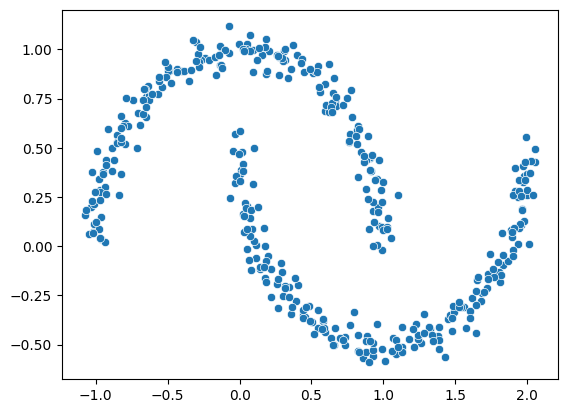

In [8]:
sns.scatterplot(x=x, y=y, legend = False)
plt.show()

In [9]:
# Modelos
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [10]:
# Inicialiar modelos
model_kmeans = KMeans(n_clusters = 2)
model_dbscan = DBSCAN(eps = 0.2)

In [11]:
# Ajuste y prediccion
clusters_km = model_kmeans.fit_predict(X)
clusters_dbscan = model_dbscan.fit_predict(X)

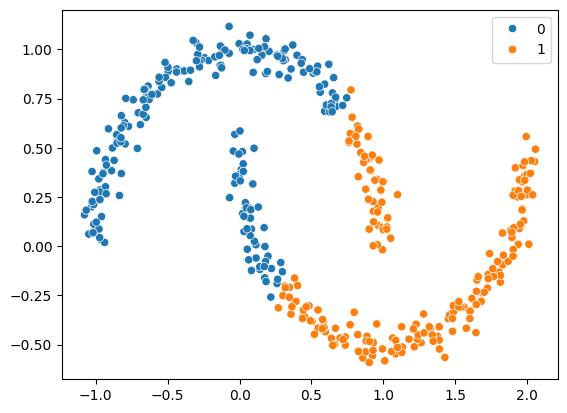

In [13]:
# Visualizacion de clusters K-Means
sns.scatterplot(x=x, y=y, hue = clusters_km)
plt.show()

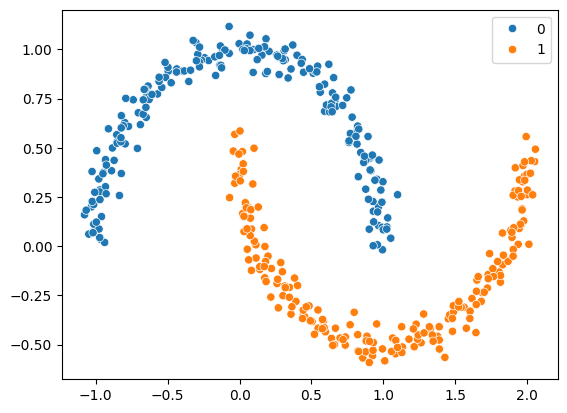

In [14]:
# Visualizacion de clusters DBSCAN
sns.scatterplot(x=x, y=y, hue = clusters_dbscan)
plt.show()

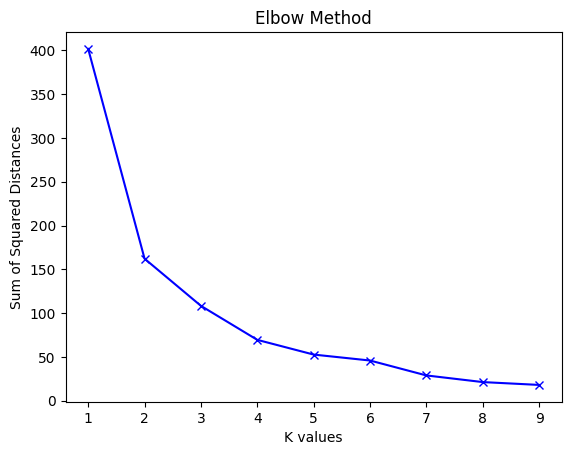

In [15]:
# Rango de valores para numero de cluster
K = range(1,10)
sum_of_squared_distances = []

# Suma de las distancias al cuadrado
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

### __Aplicación a la detección de anomalías__

In [20]:
random.seed(7)
x, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(20, 5))

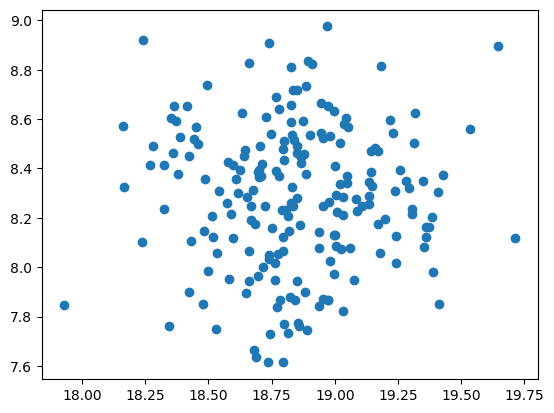

In [21]:
plt.scatter(x[:,0], x[:,1])
plt.show()

In [22]:
# inicializar modelo
dbscan = DBSCAN(eps = 0.28, min_samples = 20)

In [23]:
# ajuste y prediccion
pred = dbscan.fit_predict(x)

In [24]:
# encontrar anomalias
anom_index = where(pred == -1)
values = x[anom_index]

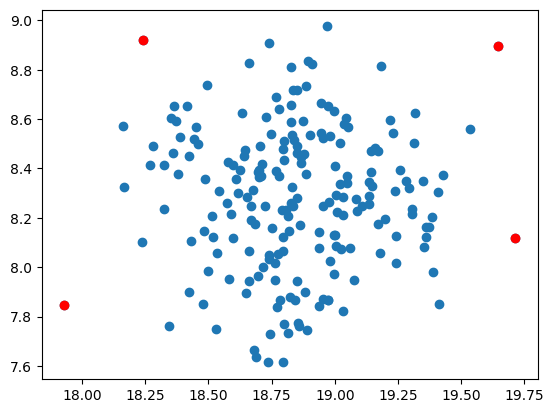

In [25]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()